In [49]:
titanic = read.csv("https://peter.butka.website.tuke.sk/test/titanic2.csv")

In [52]:
head(titanic)

,pclass,survived,sex,age,sibsp,parch,ticket,fare,cabin,embarked,family,has_family,fare_ordinal,title,title_short,age_ordinal,deck
,<int>,<fct>,<chr>,<dbl>,<int>,<int>,<chr>,<dbl>,<chr>,<chr>,<int>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
1,1,TRUE,female,29.00,0,0,24160,211.3375,B5,Southampton,0,False,most expensive,Miss,Miss,adult,B
2,1,TRUE,male,0.92,1,2,113781,151.5500,C22 C26,Southampton,3,True,most expensive,Master,rare title,child,C
3,1,FALSE,female,2.00,1,2,113781,151.5500,C22 C26,Southampton,3,True,most expensive,Miss,Miss,child,C
4,1,FALSE,male,30.00,1,2,113781,151.5500,C22 C26,Southampton,3,True,most expensive,Mr,Mr,adult,C
5,1,FALSE,female,25.00,1,2,113781,151.5500,C22 C26,Southampton,3,True,most expensive,Mrs,Mrs,adult,C
6,1,TRUE,male,48.00,0,0,19952,26.5500,E12,Southampton,0,False,more expensive,Mr,Mr,adult,E


In [51]:
titanic$survived = as.factor(as.logical(titanic$survived))

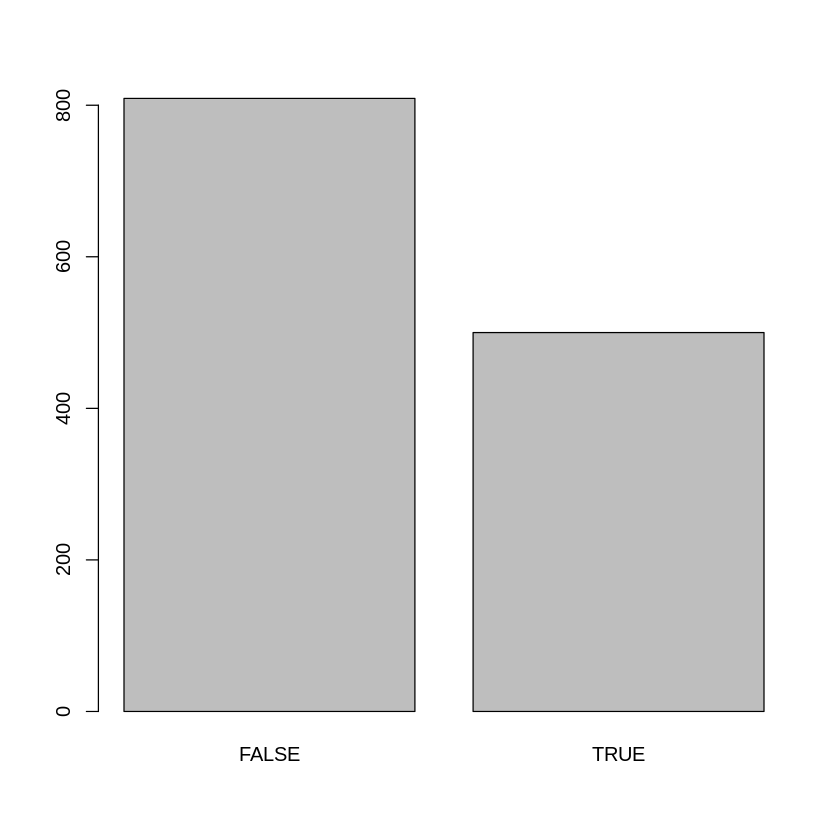

In [53]:
barplot(table(titanic$survived))

In [54]:
titanic$age_d =  ifelse(titanic$age > 18, "adult" , "child")  

In [75]:
install.packages("party")
library(party)

also installing the dependencies ‘TH.data’, ‘libcoin’, ‘multcomp’, ‘mvtnorm’, ‘modeltools’, ‘strucchange’, ‘coin’


Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done

Loading required package: grid

Loading required package: mvtnorm

Loading required package: modeltools

Loading required package: stats4

Loading required package: strucchange

Loading required package: zoo


Attaching package: ‘zoo’


The following objects are masked from ‘package:base’:

    as.Date, as.Date.numeric


Loading required package: sandwich



In [80]:
indexes = sample(nrow(titanic), nrow(titanic)*0.8)
titanic$sex = as.factor(titanic$sex)
titanic$age_d = as.factor(titanic$age_d)

train_data = titanic[indexes,c("pclass", "sex", "fare", "age_d", "survived")]
test_data = titanic[-indexes,c("pclass", "sex", "fare", "age_d", "survived")]

In [81]:
tree = ctree(survived ~ ., data=train_data)

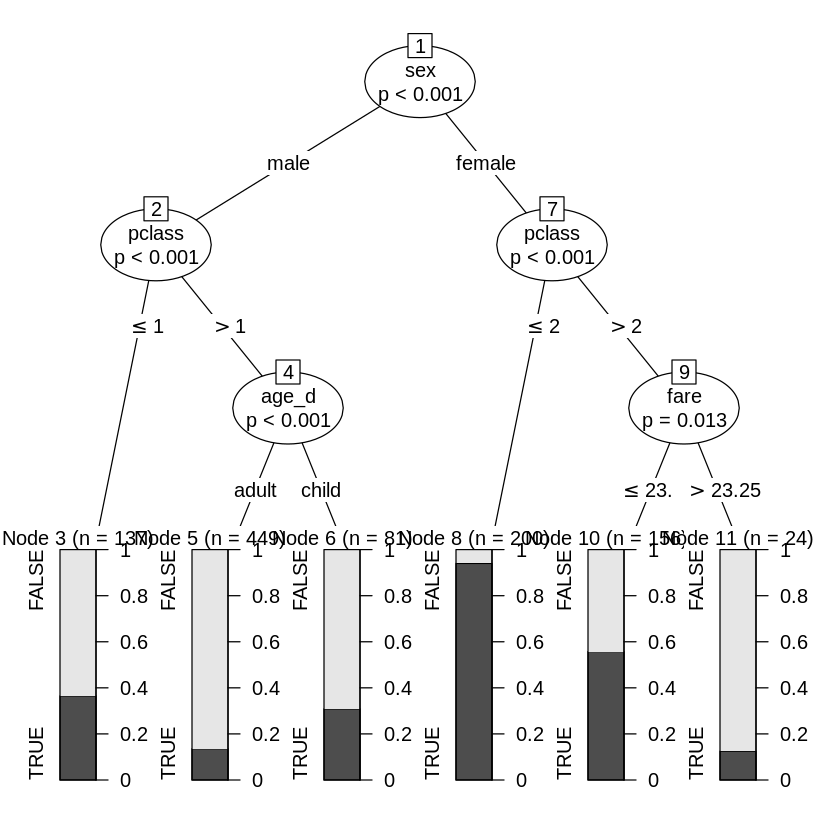

In [83]:
plot(tree)

In [64]:
library(caret)

In [84]:
predicted = predict(tree, test_data)

In [86]:
table(test_data$survived, predicted)

       predicted
        FALSE TRUE
  FALSE   160   16
  TRUE     25   61